# Blocka Cash And Irorun App Review 
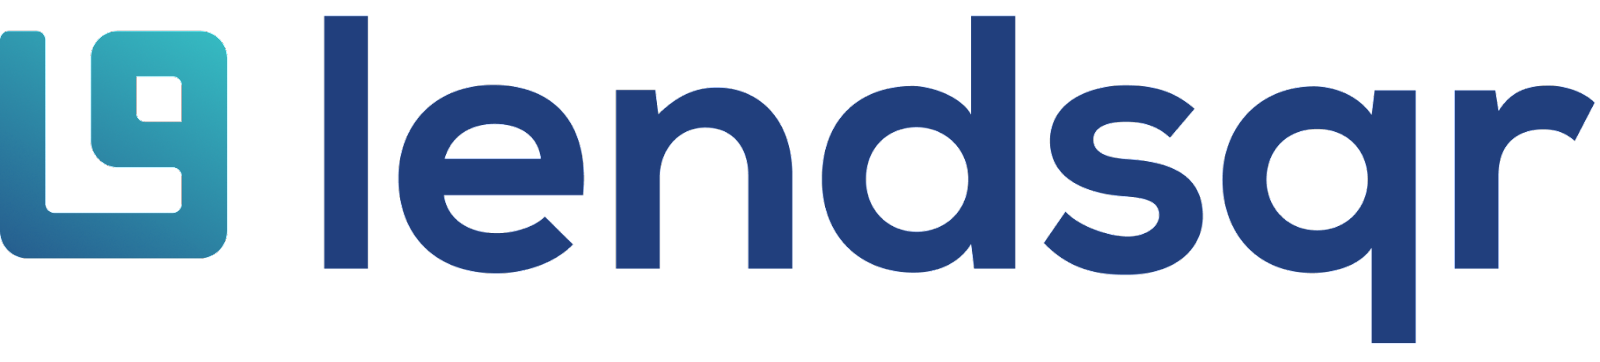
**Test for intern**
### Author: Precious Iyekeoretin

### Introduction
**Blocka Cash is a mobile app that provides quick and easy access to loans. The app is designed to make the loan application process as simple and convenient as possible, eliminating the need for long queues, paperwork, and waiting times. To get started with Blocka Cash, users need to sign up and set up an account, apply for a loan in seconds, and receive the loan instantly and directly into their wallet. The app offers micro-credit and makes provision for short-term personal loans, with loan amounts ranging from N5,000 to N50,000 depending on the user's credit score. The repayment period is usually monthly, with interest rates ranging from 3% to 10% per month, which equates to an Annual Percentage Rate (APR) of 36% to 120%. When assessing a user's eligibility for a loan, the app takes into account several factors such as past loan performance and credit score. The app is powered by James Crown Credit Limited and is licensed as a Money Lender by the Ogun State Government of Nigeria. Users can contact the company with feedback, tips, questions, and concerns.**

In [202]:
# importing libraries
import requests as rq
from bs4 import BeautifulSoup as bs

In [203]:
url = "https://play.google.com/store/apps/details?id=cash.blocka&gl=ng&pli=1"
c = rq.get(url)

In [204]:
c.status_code

200

In [205]:
c.reason

'OK'

In [256]:
html = c.text
html_s = bs(html, "html.parser")
html_s.find("title")

<title id="main-title">Blocka Cash - Quick Loans - Apps on Google Play</title>

In [257]:
# scraping the Blocka Cash app on google playstore
about=html_s.find(class_="bp9Aid")
for about in html_s:
    print(about.text)


Blocka Cash - Quick Loans - Apps on Google Playgoogle_logo PlayGamesAppsKidsnonesearchhelp_outline Sign in with Googleplay_appsLibrary & devicespaymentPayments & subscriptionsreviewsMy Play activityredeemOfferssettingsSettingsPrivacy Policy • Terms of ServiceGamesAppsKidsBlocka Cash - Quick LoansBlocka Cash4.0star1.87K reviews100K+DownloadsRated for 3+infoInstallAdd to wishlistAbout this apparrow_forwardBlocka Cash makes access to loans easy and hassle-free, just when you need it. Do away with long queues, paperwork and waiting time. All you need is your smartphone and the Blocka Cash app!Getting started with Blocka Cash is easy. Just follow the steps below:- Sign up and set up an account.- Apply for a loan in seconds.- Receive your loan instantly and directly into your wallet.The process is simple and convenient!OUR LOANS AND REPAYMENT TERMSBlocka Cash offers micro-credit and makes provision for short-term personal loans of at least N5,000 and up to N50,000 depending on your credit s

In [258]:
# importing the required libraries for scraping the reviews
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid



In [259]:
# Entry the credential needed.
g_reviews = reviews_all(
        "cash.blocka",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='ng', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )
a_reviews = AppStore('ng', 'blocka-cash', '1548212165')
a_reviews.review()



2023-01-16 14:31:05,784 [INFO] Base - Initialised: AppStore('ng', 'blocka-cash', 1548212165)
2023-01-16 14:31:05,785 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ng/app/blocka-cash/id1548212165
2023-01-16 14:31:10,316 [INFO] Base - [id:1548212165] Fetched 74 reviews (74 fetched in total)


In [262]:
# Converting json to pandas dataframe and dropping userimage etc.
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'ng'


In [263]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'ng'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)


result = pd.concat([g_df2,a_df2])
result

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,a29f3e62-9882-45e1-ad48-18376062e383,Feyi Osimokun,None,Blocka cash app makes access to loans very easy.,5,0,2023-01-15 14:14:36,None,NaT,en,ng
1,Google Play,25f9a709-521d-4540-ad15-e94b08fc6550,Chinedu,None,"Great app design, of say to set up.",5,0,2023-01-15 11:29:44,None,NaT,en,ng
2,Google Play,545d3c6d-2ba3-44f8-b004-bec353bbcb0a,Chideraa Ude,None,Really makes lending easy for the average Nige...,5,0,2023-01-14 14:56:40,None,NaT,en,ng
3,Google Play,e4409827-d6e2-417d-8f5c-141f62bfdc6e,Faith,None,Amazing! Quick indeed....,5,0,2023-01-14 13:12:14,None,NaT,en,ng
4,Google Play,220159b7-884d-4af2-ab95-4eea87fdc778,Bustin Jieber,None,A clean User interface and swift loan process ...,5,0,2023-01-14 09:36:56,None,NaT,en,ng
...,...,...,...,...,...,...,...,...,...,...,...,...
69,App Store,b28bba7b-569d-4516-838c-c209bcb0fc89,vicoyet,I need referral code,Nice app,2,None,2022-02-28 20:03:42,"{'id': 30150261, 'body': ' Please note that yo...",None,en,ng
70,App Store,95015688-6bb9-4b81-8708-07c9c89564b9,petit3993,Olaide,What’s the referral code means,5,None,2022-08-25 15:07:14,None,None,en,ng
71,App Store,b2969d76-41a8-428e-9a58-ee3ebf445440,dhuddbnj,Poor,I tried applying but when I got to the place w...,1,None,2022-07-14 18:45:11,None,None,en,ng
72,App Store,3998a116-e12b-448f-8e11-e238241f35ae,jamesbhadman,Stupid app,Rubbish app just wested.my time,1,None,2022-03-29 00:21:23,"{'id': 30150115, 'body': 'We are sorry you hd ...",None,en,ng


In [254]:
# checking information
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   source                   1241 non-null   object        
 1   review_id                1241 non-null   object        
 2   user_name                1241 non-null   object        
 3   review_title             74 non-null     object        
 4   review_description       1241 non-null   object        
 5   rating                   1241 non-null   int64         
 6   thumbs_up                1167 non-null   object        
 7   review_date              1241 non-null   datetime64[ns]
 8   developer_response       1075 non-null   object        
 9   developer_response_date  1020 non-null   object        
 10  laguage_code             1241 non-null   object        
 11  country_code             1241 non-null   object        
dtypes: datetime64[ns](1), int64(1), obje

In [255]:
# checking the statistical summary 
result.describe()

,rating
count,1241.000000
mean,3.288477
std,1.728958
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


## What is the distribution of ratings in the dataset?

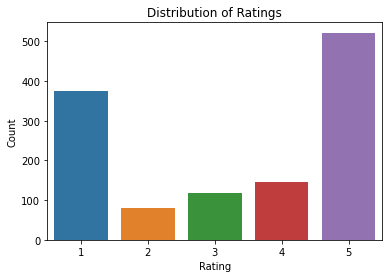

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.countplot(x='rating', data=result)

# Add labels and title
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.show()


## What is the distribution of ratings by source?

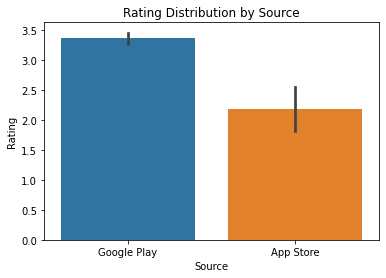

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
sns.barplot(x='source', y='rating', data=result)

# Add labels and title
plt.title("Rating Distribution by Source")
plt.xlabel("Source")
plt.ylabel("Rating")

# Show the plot
plt.show()


## WordCloud 

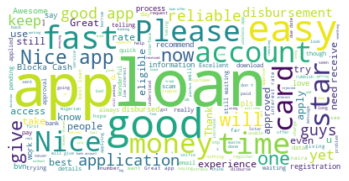

In [280]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a list of the review_description
review_descriptions = result['review_description'].tolist()
# Join all the review_descriptions into one string
review_descriptions_string = ' '.join(review_descriptions)
# Create the word cloud
wordcloud = WordCloud(background_color='white',).generate(review_descriptions_string)
# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")
plt.show()


# Irorun  App Review 
**Test for intern**

### Introduction
**Irorun is a mobile app that offers fast and easy access to loans. The app's name, "Irorun," means peace of mind in the Yoruba language, and it aims to provide users with a convenient and reliable way to fix their spending gaps. To get started with Irorun, users need to create an account, apply for a loan in seconds, and receive the loan straight into their wallet. They also have the option to increase their loan limit every time they repay a loan. The app offers microloans with amounts ranging from N5,000 to N50,000. The repayment terms range from 60 days to 180 days, with interest rates ranging from 3% to 5% per month, which equates to a typical APR of 36%. The app usually does not require collateral or guarantors, but for loans beyond certain amounts, additional documentation may be required. The app assesses a user's eligibility for a loan by looking at several signals such as credit score and past loan performance. The company welcomes feedback and tips to make their services better and can be contacted at support@irorun.com**

In [294]:

url = "https://play.google.com/store/apps/details?id=com.irorun&gl=BM"
j = rq.get(url)
j.status_code

htm = j.text
htm = bs(htm, "html.parser")
htm.find("title")




<title id="main-title">Irorun - Fast loans with ease - Apps on Google Play</title>

In [297]:
# scraping the Blocka Cash app on google playstore
about=htm.find(class_="bp9Aid")
for about in htm:
    print(about.text)


Irorun - Fast loans with ease - Apps on Google Playgoogle_logo PlayGamesAppsKidsnonesearchhelp_outline Sign in with Googleplay_appsLibrary & devicespaymentPayments & subscriptionsreviewsMy Play activityredeemOfferssettingsSettingsPrivacy Policy • Terms of ServiceGamesAppsKidsIrorun - Fast loans with easeLendsqr4.2star2.14K reviews100K+DownloadsRated for 3+infoAdd to wishlistAbout this apparrow_forwardIrorun, which means peace of mind in the Yorùbá language, makes it easy for you to access loans just when you need it. Sign up in a few seconds, apply for a loan, and receive your money into your wallet. You can transfer to your bank accounts immediately. It's a fast, convenient, and reliable way to fix your spending gap. It's Irorun!GETTING STARTED IS VERY EASY* Create an account.* Apply in seconds.* Receive your loan straight into your wallet.* Increase your loan limit every time you repay a loan.REPAYMENT TERMS FOR ALL LOANSDepending on the loan amount for which you are eligible, you h

In [300]:
# Entry the credential needed.
g_reviews = reviews_all(
        "com.irorun",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='ng', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )
a_reviews = AppStore('ng', 'irorun-fast-loans-with-ease', '1511430092')
a_reviews.review()


2023-01-16 16:35:28,677 [INFO] Base - Initialised: AppStore('ng', 'irorun-fast-loans-with-ease', 1511430092)
2023-01-16 16:35:28,680 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ng/app/irorun-fast-loans-with-ease/id1511430092
2023-01-16 16:35:34,284 [INFO] Base - [id:1511430092] Fetched 120 reviews (120 fetched in total)
2023-01-16 16:35:37,433 [INFO] Base - [id:1511430092] Fetched 188 reviews (188 fetched in total)


In [301]:
# Converting json to pandas dataframe and dropping userimage etc.
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'ng'

In [303]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'ng'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)


results = pd.concat([g_df2,a_df2])
results

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,7b553cbc-92a0-4462-8eff-acabc33bd412,Chinedu,None,Great user experience,5,0,2023-01-15 11:30:57,None,NaT,en,ng
1,Google Play,14e1b7d9-cee9-4a4a-8261-3a533dd5e27b,Ogunniyi Daniel,None,Irorun loan app is one of the best I've seen s...,5,0,2023-01-15 11:11:52,None,NaT,en,ng
2,Google Play,fc2225b7-4f21-47ae-a3ce-de88de879629,Olayinka Suliat,None,They are one of the best loan app,5,0,2023-01-15 11:11:19,None,NaT,en,ng
3,Google Play,6f071a37-26c6-4391-9ca1-42da89b2612e,Maryam Yusuf,None,Excellent and magnificent App u can rely on in...,5,0,2023-01-14 22:16:03,None,NaT,en,ng
4,Google Play,30f4e6bb-8cc2-4a98-9093-33819ed3a9dc,Chideraa Ude,None,It's an awesome lending app I'm hoping every N...,5,0,2023-01-14 14:54:30,None,NaT,en,ng
...,...,...,...,...,...,...,...,...,...,...,...,...
183,App Store,c38a9417-142b-4c9c-8330-606a78fa5b3b,Tblrne,Scam!,I cant get a loan. Every other thing seem to h...,1,None,2022-10-01 12:28:02,"{'id': 32348580, 'body': 'Hi, we are soo sorry...",None,en,ng
184,App Store,b634544c-ec17-4ce8-8f1d-62ae0a01441e,Deeneypraise,Loan not activated,This is my first time of using the app and I w...,5,None,2022-08-15 14:42:48,"{'id': 31506731, 'body': 'Hi User, we are very...",None,en,ng
185,App Store,3dfd612a-d660-4bc9-bb50-63be779008c3,Skbobby1,Referral code issue,Hello please I am new here and how would I get...,5,None,2022-02-18 14:03:17,None,None,en,ng
186,App Store,f4562271-a99b-48ae-9d57-2a3a1306ad54,Hazzy@0,Referral issues,I can’t create account with them since all thi...,1,None,2022-04-04 22:34:34,None,None,en,ng


## What is the distribution of ratings in the dataset?

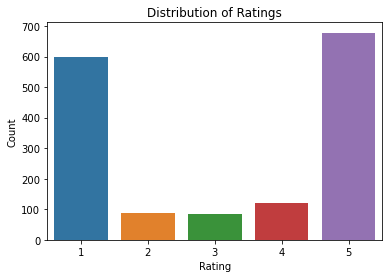

In [304]:
# Create the bar plot
sns.countplot(x='rating', data=results)

# Add labels and title
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.show()


## What is the distribution of ratings by source?

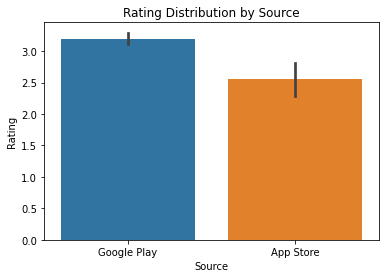

In [308]:
# Create the box plot
sns.barplot(x='source', y='rating', data=results)

# Add labels and title
plt.title("Rating Distribution by Source")
plt.xlabel("Source")
plt.ylabel("Rating")

# Show the plot
plt.show()

## WordCloud 

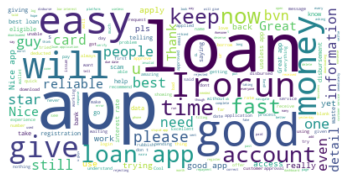

In [309]:
# Create a list of the review_description
review_descriptions = results['review_description'].tolist()
# Join all the review_descriptions into one string
review_descriptions_string = ' '.join(review_descriptions)
# Create the word cloud
wordcloud = WordCloud(background_color='white',).generate(review_descriptions_string)
# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")
plt.show()